In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train.csv')

# Replace all missing data with zeros
df["total"].replace("?", 0, inplace=True)

# Convert to numeric
df['total'] = df['total'].astype(float)

# Prepare the dataset for training
df.rename(columns={'datetime': 'ds', 'total': 'y'}, inplace=True)

# df.head()


In [3]:
from neuralprophet import NeuralProphet


m = NeuralProphet(epochs=30)
m.add_country_holidays(country_name='Russia')
m.fit(df, freq='H')

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.997% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (py.warnings._showwarnmsg) - /home/alantheknight/nto-final/team/.venv/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additive_events_dims = additive_events_dims.append(

WARNING - (py.warnings._showwarnmsg) - /home/alantheknight/nto-final/team/.venv/lib/python3.9/site-packages/neuralprophet/utils.py:205: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  additive_events_dims = additive_events

  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.64E-01, min: 1.47E+00


  0%|          | 0/163 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.27E-01, min: 2.15E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.90E-01
Epoch[30/30]: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s, SmoothL1Loss=0.00342, MAE=1.33e+4, RMSE=1.99e+4, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.317390,145465.996006,185180.338407,0.0
1,0.005670,18644.571393,25911.457279,0.0
2,0.004806,17298.482622,23897.614749,0.0
3,0.009551,25773.454519,33822.985908,0.0
4,0.024905,42258.733496,53538.859159,0.0
5,0.038478,53246.693944,67156.888035,0.0
6,0.053186,63504.801476,79648.700120,0.0
7,0.047443,60319.094294,75880.184233,0.0
8,0.059312,65686.881870,82592.771555,0.0
9,0.046204,58438.361671,73654.068311,0.0


In [4]:
future = m.make_future_dataframe(df=df, periods=4344, n_historic_predictions=False)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 98.24% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


In [5]:
forecast = m.predict(df=future)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alantheknight/nto-final/team/.venv/lib/python3.9/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_13065/3626153482.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()



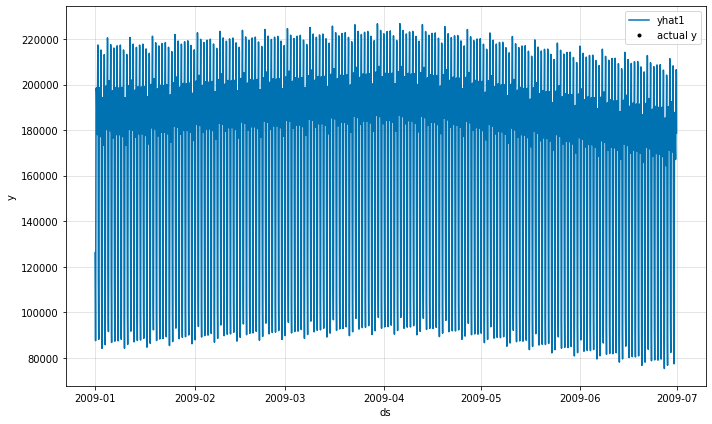

In [6]:
p = m.plot(forecast)
p.show()


# detailed = m.plot_components(forecast)
# detailed.show()


In [ ]:
with open("answer.txt", "w") as f:
    for v in forecast['yhat1']:
        f.write(str(v))
        f.write('\n')
